# Evoluční algoritmy - spojitá a kombinatorická optimalizace

Minule jsme si ukazovali jednoduchý genetický algoritmus, který pracoval s binárními jedinci. Dnes se podíváme na spojité a celočíselné reprezentace jedinců a na další druhy evolučních operátorů.

## Minimalizace Rastrigin funkce

V následujícím cvičení si vyzkoušíme napsat jednoduchý evoluční algoritmus pro minimalizace [Rastrigin funkce](https://en.wikipedia.org/wiki/Rastrigin_function). Tato funkce je typickým příkladem nelineární funkce a běžně se používá při testování chování optimalizačních algoritmů. Nalezení jejího globálního minima je složité, protože obsahuje spoustu lokálních minim. Globální minimum se nachází v bodě 0.

In [1]:
import numpy as np
import random
import copy
import math
%matplotlib inline
import matplotlib.pyplot as plt

Nejprve si definujem, jak tedy vypadá ona výše zmíněná funkce, kterou budeme chtít minimalizovat a naimplementujeme podle toho fitness. Hodnota fitness je vlastně hodnota rastrigin funkce v daném bodě, který jedinec reprezentuje. Protože evoluční algoritmus je maximalizační algoritmus, obrátíme znaménko u výsledné hodnoty funkce.

In [2]:
def fitness(individual):
    N = len(individual)
    A = 10
    value = A*N
    for i in range(0,len(individual)):
        value += individual[i]**2 - A*math.cos(2*math.pi*individual[i])
    return -value

Potom je třeba si rozmyslet, jak bude vypadat jedinec. Bude to bude floating point vektor, kde hodnoty budou čísla z intervalu [-5.12,5.12] podle definičního oboru rastrigin funkce. Napíšeme si tedy funkci na vytvoření náhodné populace.

In [3]:
def random_population(population_size, individual_size):
    population = []
    
    for i in range(0,population_size):
        individual = np.random.uniform(-5.12, 5.12, size=(individual_size,))
        population.append(individual)
        
    return population

Pro vytvořenou populaci jedinců si napíšeme svoje operátory křížení a mutace. Křížení může být aritmetické, například vážený průměr dvou jedinců, nebo strukturální, kdy opět prohazujeme části jedinců. Zde si zkusíme naimplementovat aritmetické křížení pomocí průměrů hodnot ze dvou vybraných jedinců.

In [4]:
def crossover_mean(population, cross_prob=0.8, alpha=0.25):
    new_population = []
    
    for j in range(0,len(population)//2):
        indiv1 = copy.deepcopy(population[2*j])
        indiv2 = copy.deepcopy(population[2*j+1])
        child1 = indiv1
        child2 = indiv2
        if random.random()<cross_prob:
            for i in range(0, len(indiv1)):
                child1[i] = alpha*indiv1[i] + (1-alpha)*indiv2[i]
                child2[i] = (1-alpha)*indiv1[i] + alpha*indiv2[i]
        new_population.append(child1)
        new_population.append(child2)
        
    return new_population

Mutace může být buď netížená, což znamená, že se pro mutovanou pozici vygeneruje nové číslo z daného rozsahu hodnot, nebo zatížená, kdy k hodnotě v jedinci přičtu nějaké číslo z normálního rozdělení s danou odchylkou (například 1) a nulovou střední hodnotou. Vyzkoušíme si zda naimplementovat nezatíženou mutaci, která pro mutovanou pozici vybere nové náhodné číslo z rozsahu možných hodnot rastrigin funkce.

In [5]:
def mutation_switch(population,individual_mutation_prob=0.2,value_mutation_prob=0.1):
    new_population = []
    for j in range(0,len(population)):
        individual = copy.deepcopy(population[j])
        if random.random() < individual_mutation_prob:
            for i in range(0,len(individual)):
                if random.random() < value_mutation_prob:
                    individual[i] = np.random.uniform(-5.12, 5.12)
        new_population.append(individual)
    return new_population

Na závěr si definujeme ještě selekci. Tentokrát si vyzkoušíme turnajovou selekci, kdy se náhodně vybere k jedinců z populace a udělá se mezi nimi turnaj a vybere se ten s nejlepší fitness. Tato selekce má oproti ruletové velkou výhodu -- nezávisí na hodnotě fitness, ale pouze na pořadí jedinců v populaci podle fitness. Tedy nám nevadí, že vracíme zápornou hodnotu fitness a selekce se nám nerozbije.

In [6]:
def selection(population,fitness_value, k): 
    new_population = []
    for i in range(0,len(population)):
        individuals = []
        fitnesses = []
        for _ in range(0,k):
            idx = random.randint(0,len(population)-1)
            individuals.append(population[idx])
            fitnesses.append(fitness_value[idx])
        new_population.append(copy.deepcopy(individuals[np.argmax(fitnesses)]))
    return new_population 

Nyní si stejně jako v minulé hodině definujeme celý evoluční algoritmus a pak ho pustíme a sledujeme, co se bude dít.

In [7]:
def evolution(population_size, individual_size, max_generations):
    max_fitness = []
    population = random_population(population_size,individual_size)
    
    for i in range(0,max_generations):
        fitness_value = list(map(fitness, population))
        max_fitness.append(max(fitness_value))
        parents = selection(population,fitness_value,2)
        children = crossover_mean(parents)
        mutated_children = mutation_switch(children)
        population = mutated_children
        
    # spocitame fitness i pro posledni populaci
    fitness_value = list(map(fitness, population))
    max_fitness.append(max(fitness_value))
    best_individual = population[np.argmax(fitness_value)]
    
    return best_individual, population, max_fitness

best fitness:  -5.011409886051624
best individual:  [ 1.08180217e-03  3.78233742e-04  1.00177065e+00  2.05416396e-02
  9.84488628e-01  1.79699789e-02  9.49957213e-02  6.02937476e-02
 -2.21171579e-02  3.86606414e-02]


Text(0.5, 0, 'Generace')

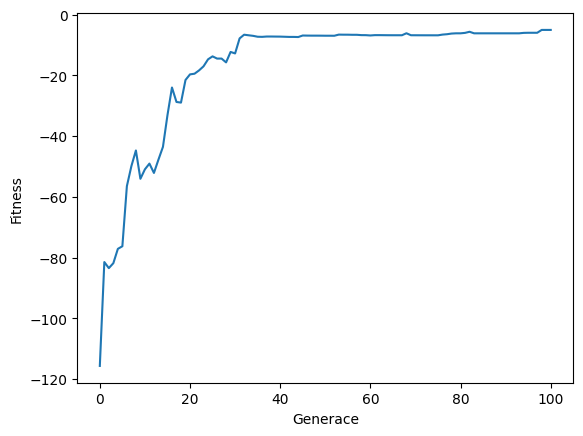

In [8]:
best, population, max_fitness = evolution(population_size=100,individual_size=10,max_generations=100)

print('best fitness: ', fitness(best))
print('best individual: ', best)


plt.plot(max_fitness)
plt.ylabel('Fitness')
plt.xlabel('Generace')


## Úkol na cvičení

V kódu výše je naprogramovaná nejjednodušší mutace -- nezatížená. Zkuste si napsat alespoň dva další druhy mutace z následujích možností a porovnat, jak se bude evoluční algoritmus chovat.
1. Zatížená mutace, kdy se k hodnotě v jedinci přičítá číslo z normalního rozdělení se střední hodnotou 0 a rozptylem sigma. Sigma se třeba navíc může během každých n generací postupně snižovat. 

2. Mutace s 1/5 pravidlem, která se používá hlavně u evolučních strategií a probíhá podobně jako zatížená mutace: přičítá k hodnotě číslo z náhodného rozdělení s 0 střední hodnotou a rozptylem sigma. Sigma se updatuje v každém kroku následovně: máme jedince a podíváme se, kolik je v populaci jedinců lepších než ten náš. Sigmu pak upravíme pomocí jednoduché rovnice: sigma = sigma * e^(počet_lepších_jedinců/počet_všech_jedinců-1/5).

3. Mutace z diferenciální evoluce, která vybere náhodně pro daného jedince dva další a složku po složce dělá rozdíl jejich hodnot a ten navíc vynásobí nějakou konstantou (třeba 0.8) a to pak přičte k hodnotám v původním jedinci. 

Můžete samozřejmě zkusit vymyslet i nějakou vlastní mutaci, nebo třeba zkusit vypnout mutaci nebo vypnout křížení a sledovat, co se bude s evolucí dít.




#### biased mutacia, kde pricitam cislo z normalnej distr okolo 0 

In [9]:
def mutation_normal(population, indiv_prob_mut=0.2, value_prob_mut=0.2, sigma=0.1):
    new_population = []
    for i in range(len(population)):
        individual = copy.deepcopy(population[i])
        if random.random() < indiv_prob_mut:
            for j in range(len(individual)):
                if random.random() < value_prob_mut:
                    epsilon = np.random.normal(loc=0.0, scale=sigma)
                    if np.abs(individual[j] + epsilon) < 5.12:
                        individual[j] += epsilon
        new_population.append(individual)
    return new_population

In [10]:
def evolution2(population_size, individual_size, max_generations):
    max_fitness = []
    population = random_population(population_size,individual_size)
    
    for i in range(0,max_generations):
        fitness_value = list(map(fitness, population))
        max_fitness.append(max(fitness_value))
        parents = selection(population,fitness_value,2)
        children = crossover_mean(parents)
        mutated_children = mutation_normal(children, indiv_prob_mut=0.1, sigma=0.5)
        population = mutated_children
        
    # spocitame fitness i pro posledni populaci
    fitness_value = list(map(fitness, population))
    max_fitness.append(max(fitness_value))
    best_individual = population[np.argmax(fitness_value)]
    
    return best_individual, population, max_fitness

best fitness:  -0.0
best individual:  [9.85915729e-12]


Text(0.5, 0, 'Generace')

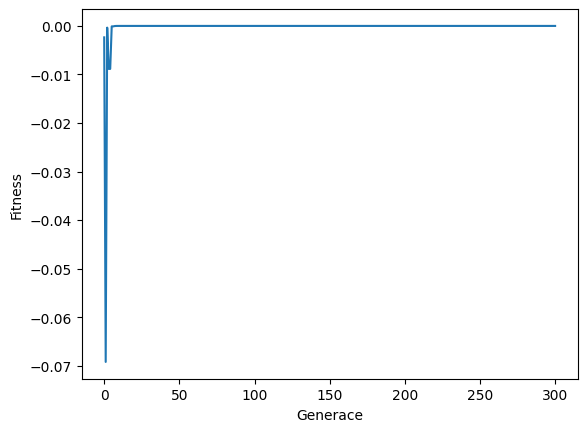

In [13]:
best, population, max_fitness = evolution2(population_size=300,individual_size=1,max_generations=300)

print('best fitness: ', fitness(best))
print('best individual: ', best)


plt.plot(max_fitness)
plt.ylabel('Fitness')
plt.xlabel('Generace')

#### 1/5 mutacia

In [14]:
def mutation_fifth(population, indiv_prob_mut=0.2, value_prob_mut=0.2, sigma=1.0):
    new_population = []
    for i in range(len(population)):
        individual = copy.deepcopy(population[i])
        fitness_values = list(map(fitness, population))
        indiv_fitness = fitness(individual)
        better_indivs = len([1 for k in range(len(population)) if fitness_values[k] > indiv_fitness])
        # TODO update sigma using 1/5 rule
        #print(better_indivs)
        if random.random() < indiv_prob_mut:
            for j in range(len(individual)):
                if random.random() < value_prob_mut:
                    epsilon = np.random.normal(loc=0.0, scale=sigma)
                    if np.abs(individual[j] + epsilon) < 5.12:
                        individual[j] += epsilon
        new_population.append(individual)
    return new_population

In [15]:
def evolution3(population_size, individual_size, max_generations):
    max_fitness = []
    population = random_population(population_size,individual_size)
    
    for i in range(0,max_generations):
        fitness_value = list(map(fitness, population))
        max_fitness.append(max(fitness_value))
        parents = selection(population,fitness_value,2)
        children = crossover_mean(parents)
        mutated_children = mutation_fifth(children, sigma=0.5)
        population = mutated_children
        
    # spocitame fitness i pro posledni populaci
    fitness_value = list(map(fitness, population))
    max_fitness.append(max(fitness_value))
    best_individual = population[np.argmax(fitness_value)]
    
    return best_individual, population, max_fitness

best fitness:  -0.9951472227305622
best individual:  [ 6.60690234e-04  5.01996041e-04 -2.32120366e-05  9.94477687e-01
 -1.67968333e-04]


Text(0.5, 0, 'Generace')

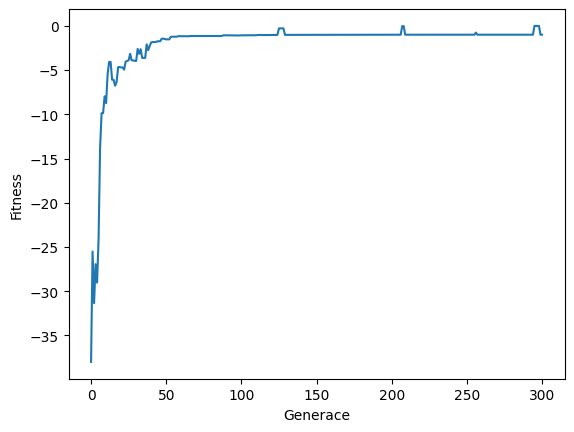

In [16]:
best, population, max_fitness = evolution3(population_size=100,individual_size=5,max_generations=300)

print('best fitness: ', fitness(best))
print('best individual: ', best)


plt.plot(max_fitness)
plt.ylabel('Fitness')
plt.xlabel('Generace')

## Deap knihovna

Nyní si opět vyzkoušíme přepsat výše zmíněný problém minimalizace rastrigin funkce pomocí operátorů knihovny deap, abychom si lépe vyzkoušeli, jak se s ní pracuje a jak v ní tvořit svoje vlastní operátory, které se nám budou hodit příští hodinu u genetického programování (to už to bez něj totiž opravdu tak snadno nepůjde).

In [17]:
from deap import base
from deap import creator
from deap import tools
from deap import algorithms

Pro jistotu si znovu definujeme vlastní funkce mutace, křížení a fitness funkci. Mutace bude opět nezatížená a křížení zůstane pomocí průměru dvou hodnot.

In [18]:
def rastring_function(individual):
    N = len(individual)
    A = 10
    value = A*N
    for i in range(0,len(individual)):
        value += individual[i]**2 - A*math.cos(2*math.pi*individual[i])
    return value,

def mutation_switch(individual,indpb):
    for i in range(0,len(individual)):
        if random.random() < indpb:
            individual[i] = np.random.uniform(-5.12, 5.12)
    return individual,

def crossover_mean(individual1, individual2, alpha=0.25):
    child1 = individual1
    child2 = individual2
    for i in range(0, len(individual1)):
        child1[i] = alpha*individual1[i] + (1-alpha)*individual2[i]
        child2[i] = (1-alpha)*individual1[i] + alpha*individual2[i]
    return child1, child2

Pak si zadefinujeme nový toolbox a přídáme do něj naše operátory. 

In [19]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,)) # -1 protoze chci minimalizovat funkci
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()

toolbox.register("attr_float", random.uniform,-5.12, 5.12)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=4)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", rastring_function)
toolbox.register("mate", crossover_mean)
toolbox.register("mutate", mutation_switch, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

Na závěr pustíme celou eveluci a můžeme sledovat, jak se nám hledání minima daří, nebo nedaří.

In [22]:
pop = toolbox.population(n=1000)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.8, mutpb=0.2, ngen=200,
                               stats=stats, halloffame=hof, verbose=True)

gen	nevals	avg    	std    	min    	max    
0  	1000  	73.6339	20.1177	15.5566	144.138
1  	857   	57.175 	16.4142	15.5566	111.585
2  	855   	48.4138	15.3696	3.91413	93.5322
3  	828   	43.4896	15.3194	3.91413	90.7884
4  	851   	40.5273	14.6327	3.91413	95.6099
5  	854   	38.6913	15.1347	2.51269	93.5789
6  	857   	35.8178	14.5124	3.88465	86.5989
7  	811   	31.2718	14.0369	1.97917	88.1248
8  	864   	27.3233	13.2357	2.11398	84.0304
9  	852   	23.5375	13.5212	0.661012	87.018 
10 	859   	17.6869	12.0064	0.474286	90.384 
11 	830   	12.7008	10.1269	0.433094	92.4515
12 	850   	7.48797	8.33541	0.0941532	71.0956
13 	839   	4.04504	7.09886	0.0633509	63.9737
14 	844   	2.24312	5.49892	0.074632 	47.7228
15 	865   	1.72425	6.02731	0.0562041	60.7725
16 	828   	1.70492	6.56992	0.0340854	55.6127
17 	857   	1.51354	6.58634	0.0393149	81.3369
18 	848   	1.85981	7.1187 	0.0327997	66.436 
19 	834   	1.6706 	6.4554 	0.0245754	55.7252
20 	848   	1.50017	6.2314 	0.0226184	50.5052
21 	844   	1.94564	7.4909 	0.0196

## Domácí úkol - Batoh

Za domácí úkol budete mít vyřešit pomocí evolučního algoritmu problém batohu. Ten spočívá v tom, že máme batoh kapacity K a N předmětů, každý s cenou c<sub>i</sub> a objemem v<sub>i</sub> a chceme vybrat takové věci, abychom maximalizovali zisk a zároveň abychom nepřekročili kapacitu batohu. 

Vstupní data máte ve složce *domaci_ukol_data*. Obsahuje čtyři soubory s daty a dva s výsledky. Na první řádce souboru s daty je vždy počet předmětů a kapacita batohu oddělené mezerou, každý další následující řádek obsahuje cenu a objem předmětu taktéž oddělené mezerou. První dva soubory slouží pro snažší odladění evolučního algoritmu a obsahují i k sobě extra soubory s optimálním řešením. Na dalších dvou máte za úkol algoritmus pustit a výsledky na nich naměřené mi poslat. 

Napište tedy nějaký svůj evoluční algoritmus, který bude řešit problém batohu a pusťte ho na vstupních datech. Svůj kód, popis evolučního algoritmu (zvolené evoluční operátory, kódování jedince, atd.) a rozbor výsledků, včetně nejlepšího dosaženého skóre i s jejich odůvodněním mi pošlete emailem do stanoveného deadline.  Pro sepsání popisu vašeho evolučního algoritmu, parametrů evoluce, zvolené reprezentace jedince a rozboru výsledků použijte [tento template](https://github.com/kackamac/Prirodou-inspirovane-algoritmy/blob/master/04_spojita_reprezentace/DU1_evolucni_algoritmy.pdf).